In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Data1.csv")

In [4]:
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,landingClass
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0


In [5]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
landingClass       0
dtype: int64

In [6]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,landingClass
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.688889
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.465542
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


In [7]:
df.shape

(90, 18)

In [8]:
df.nunique()

FlightNumber      90
Date              90
BoosterVersion     1
PayloadMass       69
Orbit             11
LaunchSite         3
Outcome            8
Flights            6
GridFins           2
Reused             2
Legs               2
LandingPad         5
Block              5
ReusedCount        6
Serial            53
Longitude          3
Latitude           3
landingClass       2
dtype: int64

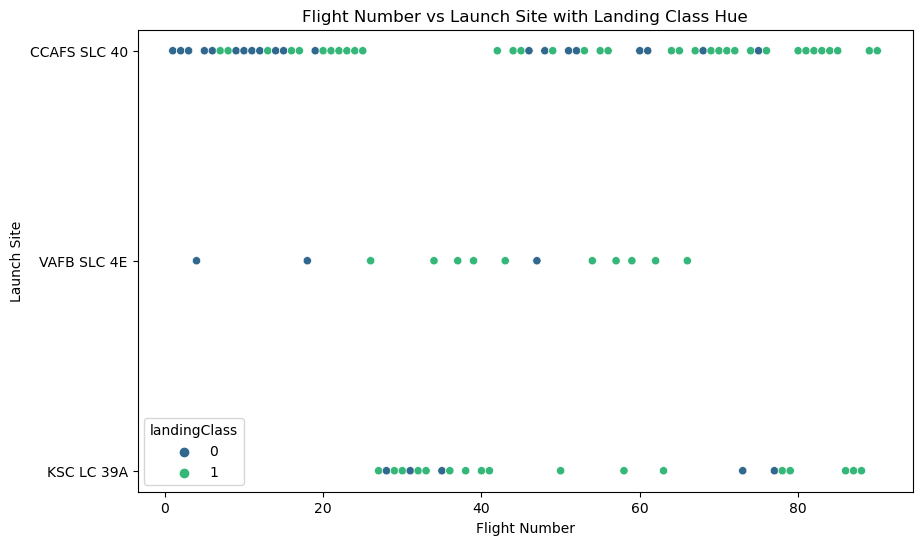

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='FlightNumber', y='LaunchSite', hue='landingClass', palette='viridis')

plt.title('Flight Number vs Launch Site with Landing Class Hue')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.show()

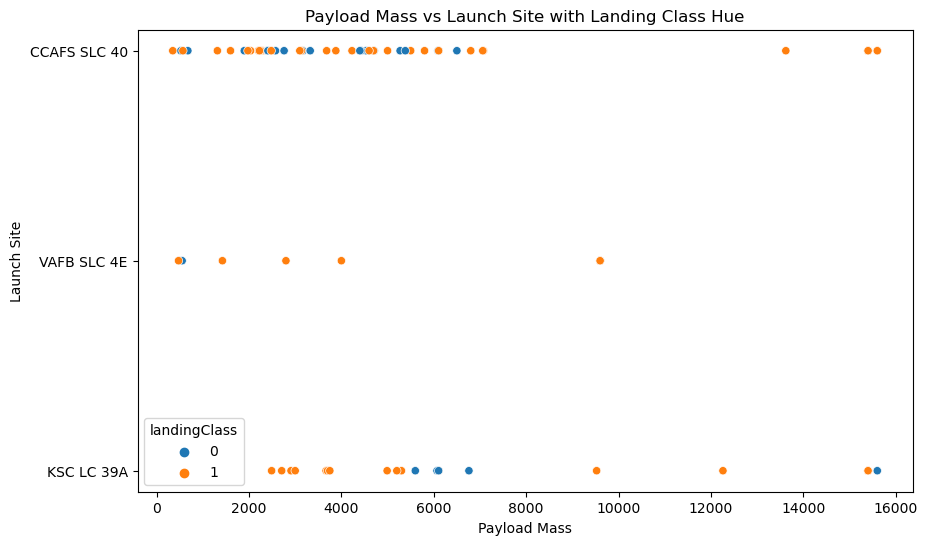

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='landingClass')

plt.title('Payload Mass vs Launch Site with Landing Class Hue')
plt.xlabel('Payload Mass')
plt.ylabel('Launch Site')
plt.show()

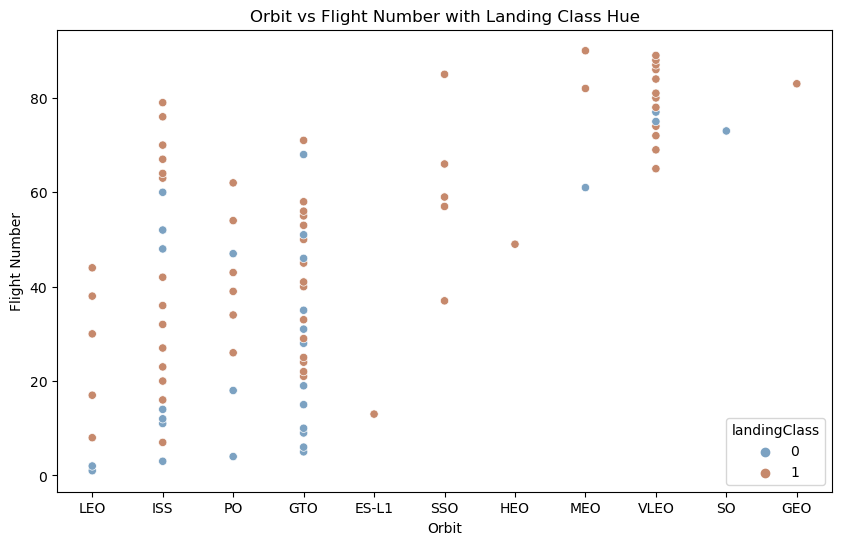

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Orbit', y='FlightNumber', hue='landingClass', palette='twilight_shifted')
plt.title('Orbit vs Flight Number with Landing Class Hue')
plt.xlabel('Orbit')
plt.ylabel('Flight Number')
plt.show()

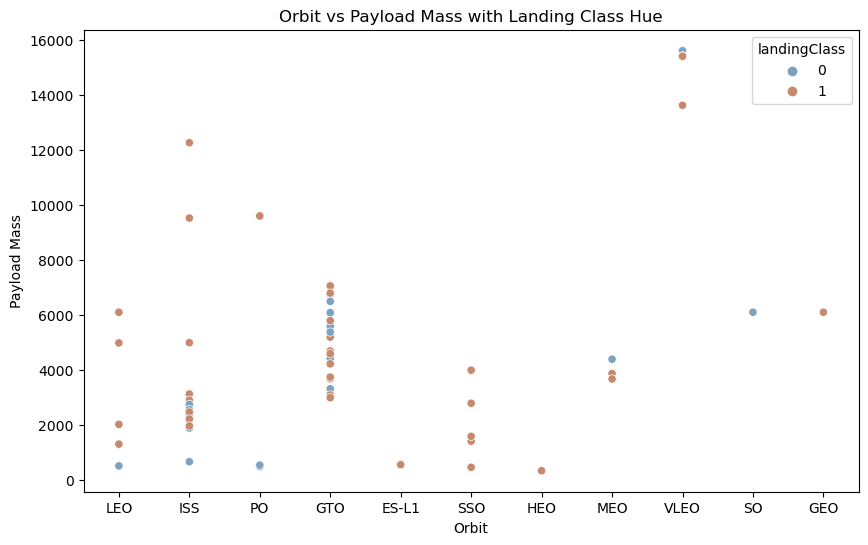

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Orbit', y='PayloadMass', hue='landingClass', palette='twilight_shifted')
plt.title('Orbit vs Payload Mass with Landing Class Hue')
plt.xlabel('Orbit')
plt.ylabel('Payload Mass')
plt.show()

In [13]:
mean_success_rate = df.groupby('Orbit')['landingClass'].mean().reset_index()

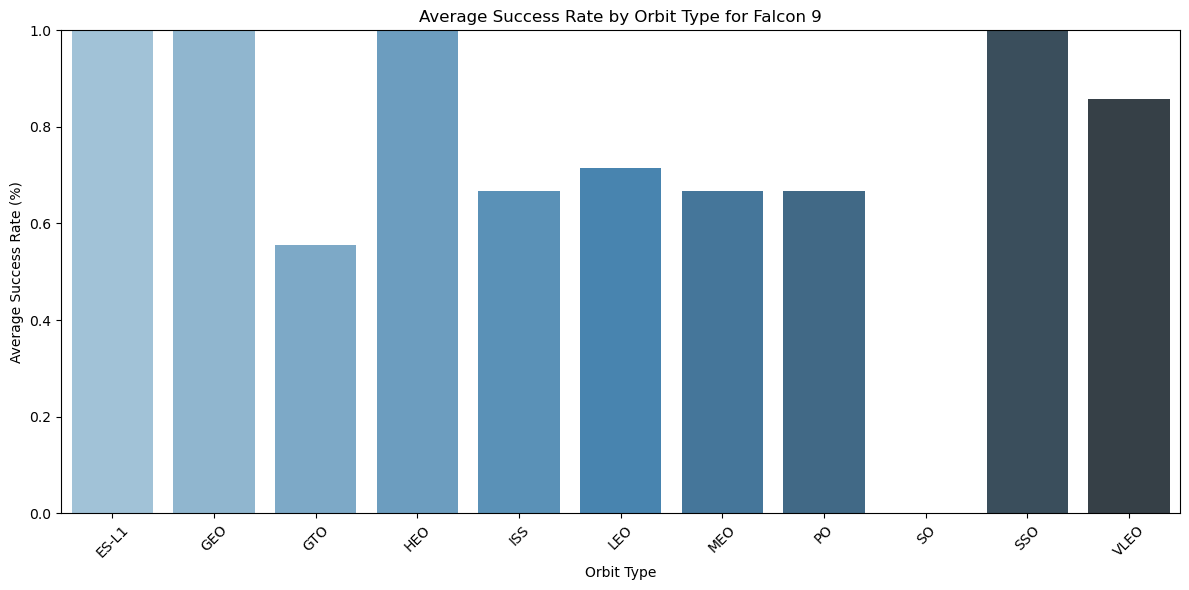

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Orbit', y='landingClass', data=mean_success_rate, palette='Blues_d')

plt.xlabel('Orbit Type')
plt.ylabel('Average Success Rate (%)')
plt.title('Average Success Rate by Orbit Type for Falcon 9')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [15]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'landingClass'],
      dtype='object')

In [16]:
df['Year']=pd.to_datetime(df['Date']).dt.year

In [17]:
yearly_mean_success_rate = df.groupby('Year')['landingClass'].mean().reset_index()
print(yearly_mean_success_rate)

   Year  landingClass
0  2010      0.000000
1  2012      0.000000
2  2013      0.000000
3  2014      0.333333
4  2015      0.500000
5  2016      0.750000
6  2017      0.833333
7  2018      0.611111
8  2019      0.900000
9  2020      0.842105


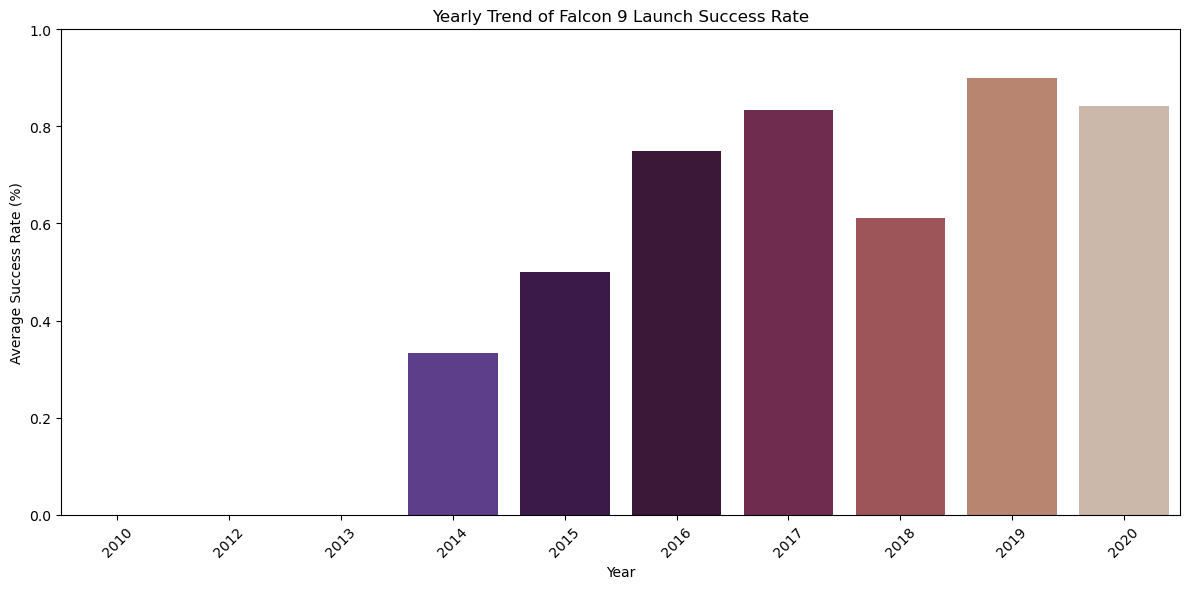

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='landingClass', data=yearly_mean_success_rate, palette='twilight')
plt.xlabel('Year')
plt.ylabel('Average Success Rate (%)')
plt.title('Yearly Trend of Falcon 9 Launch Success Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

## Feature Engineering

In [19]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,landingClass,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
df = df.drop(['Date', 'BoosterVersion', 'Outcome', 'Year'], axis=1)

In [22]:
labelEnode=LabelEncoder()
df['Orbit']=labelEnode.fit_transform(df['Orbit'])

In [23]:
df['LaunchSite']=labelEnode.fit_transform(df['LaunchSite'])

In [24]:
df['Serial']=labelEnode.fit_transform(df['Serial'])

In [25]:
df['LandingPad']=labelEnode.fit_transform(df['LandingPad'])

In [26]:
df.dtypes

FlightNumber      int64
PayloadMass     float64
Orbit             int32
LaunchSite        int32
Flights           int64
GridFins           bool
Reused             bool
Legs               bool
LandingPad        int32
Block           float64
ReusedCount       int64
Serial            int32
Longitude       float64
Latitude        float64
landingClass      int64
dtype: object

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X=df.drop('landingClass',axis=1)
y=df['landingClass']

In [29]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (72, 14)
Testing features shape: (18, 14)
Training labels shape: (72,)
Testing labels shape: (18,)


# Models

### RFC Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
print(X_train.dtypes)

FlightNumber      int64
PayloadMass     float64
Orbit             int32
LaunchSite        int32
Flights           int64
GridFins           bool
Reused             bool
Legs               bool
LandingPad        int32
Block           float64
ReusedCount       int64
Serial            int32
Longitude       float64
Latitude        float64
dtype: object


In [33]:
RFC= RandomForestClassifier(n_estimators=100, random_state=42)
RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred = RFC.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8333333333333334
Confusion Matrix:
 [[ 3  1]
 [ 2 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.92      0.86      0.89        14

    accuracy                           0.83        18
   macro avg       0.76      0.80      0.78        18
weighted avg       0.85      0.83      0.84        18



## SVM Support Vector Machine

In [36]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [37]:
scaler=StandardScaler()

In [38]:
X_train_Scale=scaler.fit_transform(X_train)

In [39]:
X_test_Scale=scaler.transform(X_test)

In [40]:
SVM=SVC(kernel='linear',random_state=42)
SVM.fit(X_train_Scale,y_train)

SVC(kernel='linear', random_state=42)

In [41]:
y_pred_SVM=SVM.predict(X_test_Scale)

In [42]:
accuracy = accuracy_score(y_test, y_pred_SVM)
conf_matrix = confusion_matrix(y_test, y_pred_SVM)
class_report = classification_report(y_test, y_pred_SVM)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9444444444444444
Confusion Matrix:
 [[ 3  1]
 [ 0 14]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.93      1.00      0.97        14

    accuracy                           0.94        18
   macro avg       0.97      0.88      0.91        18
weighted avg       0.95      0.94      0.94        18



## MLP Multi Layer Perception

In [43]:
from sklearn.neural_network import MLPClassifier

In [44]:
MLP = MLPClassifier(
    hidden_layer_sizes=(100,50),
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=42
)

In [45]:
MLP.fit(X_train_Scale,y_train)

c:\Users\Azeem ul Hassan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)

In [46]:
y_pred_MLP=MLP.predict(X_test_Scale)

In [47]:
accuracy = accuracy_score(y_test, y_pred_MLP)
conf_matrix = confusion_matrix(y_test, y_pred_MLP)
class_report = classification_report(y_test, y_pred_MLP)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8333333333333334
Confusion Matrix:
 [[ 3  1]
 [ 2 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.92      0.86      0.89        14

    accuracy                           0.83        18
   macro avg       0.76      0.80      0.78        18
weighted avg       0.85      0.83      0.84        18



### KNN K-Nearest Neighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
KNN= KNeighborsClassifier(n_neighbors=5)

In [50]:
KNN.fit(X_train_Scale,y_train)

KNeighborsClassifier()

In [51]:
y_pred_KNN=KNN.predict(X_test_Scale)

In [52]:
accuracy = accuracy_score(y_test, y_pred_KNN)
conf_matrix = confusion_matrix(y_test, y_pred_KNN)
class_report = classification_report(y_test, y_pred_KNN)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9444444444444444
Confusion Matrix:
 [[ 3  1]
 [ 0 14]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.93      1.00      0.97        14

    accuracy                           0.94        18
   macro avg       0.97      0.88      0.91        18
weighted avg       0.95      0.94      0.94        18



#### Confusion Matrix Visualization

In [53]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

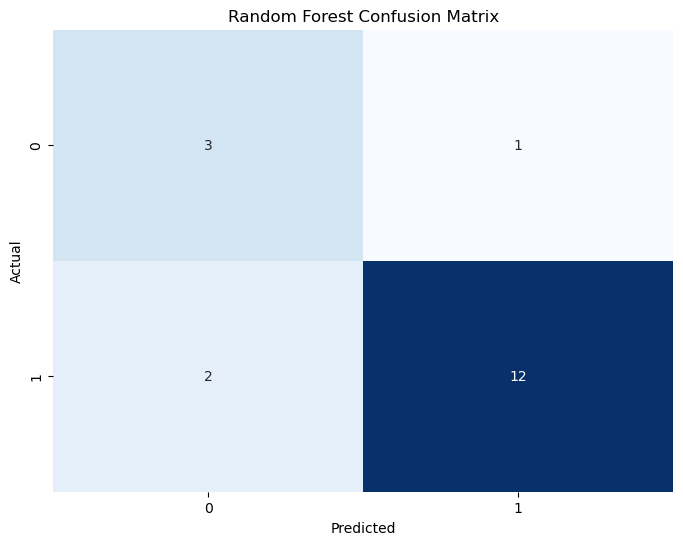

In [56]:
plot_confusion_matrix(y_test, y_pred, "Random Forest")

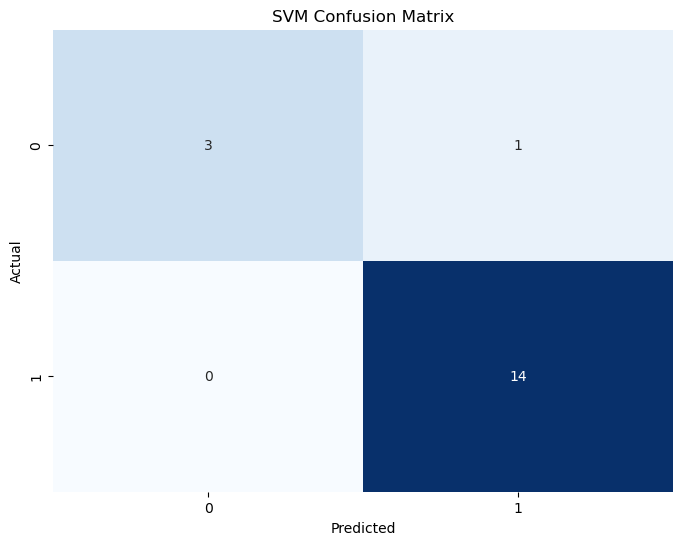

In [57]:
plot_confusion_matrix(y_test, y_pred_SVM, "SVM")

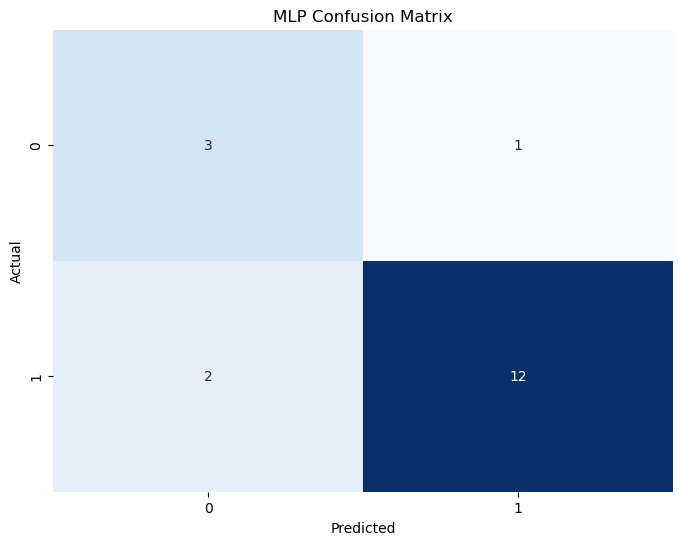

In [58]:
plot_confusion_matrix(y_test, y_pred_MLP, "MLP")

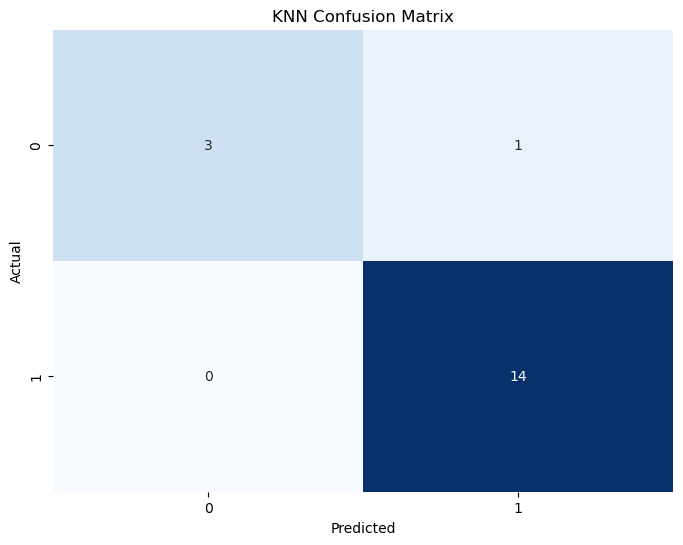

In [59]:
plot_confusion_matrix(y_test, y_pred_KNN, "KNN")

## Comparison

In [54]:
accuracy_results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'MLP', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),         # Random Forest
        accuracy_score(y_test, y_pred_SVM),     # SVM
        accuracy_score(y_test, y_pred_MLP),     # MLP
        accuracy_score(y_test, y_pred_KNN)      # KNN
    ]
})

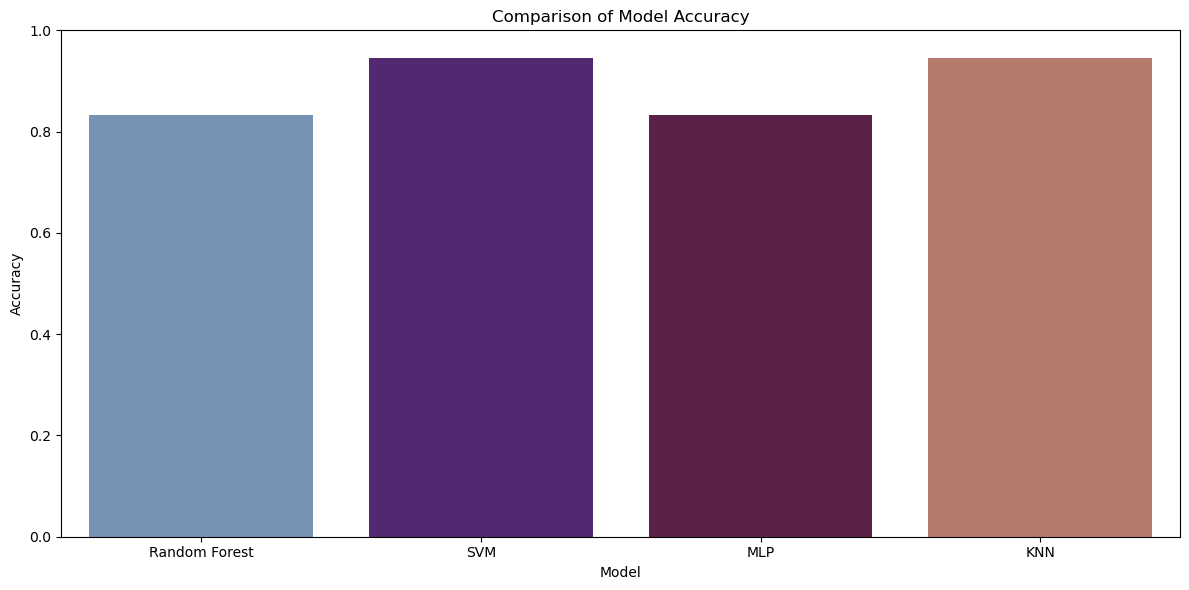

In [55]:
# Plot the accuracy comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_results, palette='twilight')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy
plt.tight_layout()
plt.show()